In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from sklearn.cluster import KMeans, MiniBatchKMeans
from random import sample

from colour import *

(2160, 3840, 3)


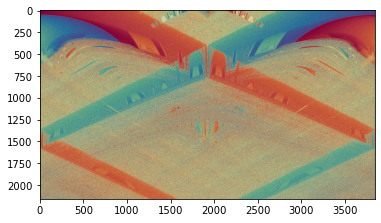

In [7]:
im = np.array(Image.open('lib/images/okmJuRN.jpg'))
print(im.shape)
plt.imshow(im)

In [48]:
sample_mask = np.random.choice([False, True], (im.shape[0], im.shape[1]), p=[0.999, 0.001])
s_im = im[sample_mask].transpose()
s_im.shape

(3, 8383)

<IPython.core.display.Javascript object>


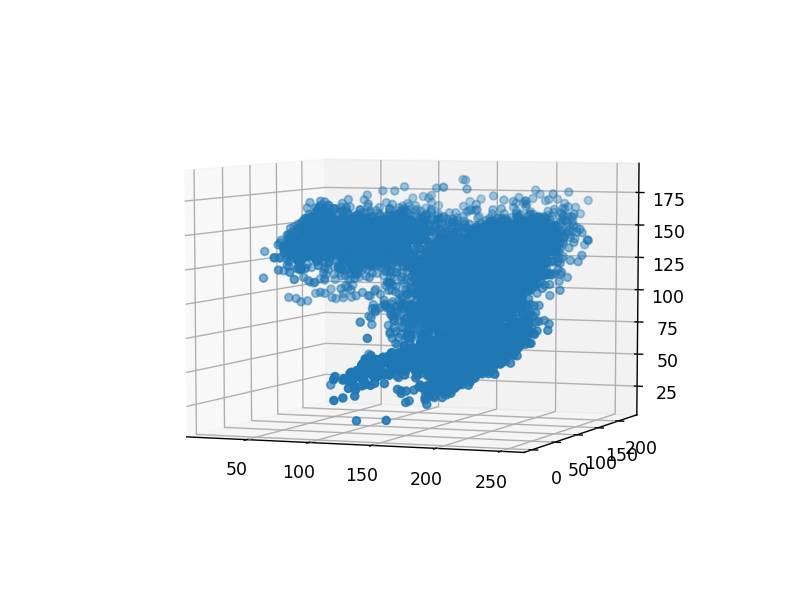

In [60]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s_im[0], s_im[1], s_im[2])

In [ ]:
k_means = KMeans().fit(s_im.transpose())

<IPython.core.display.Javascript object>


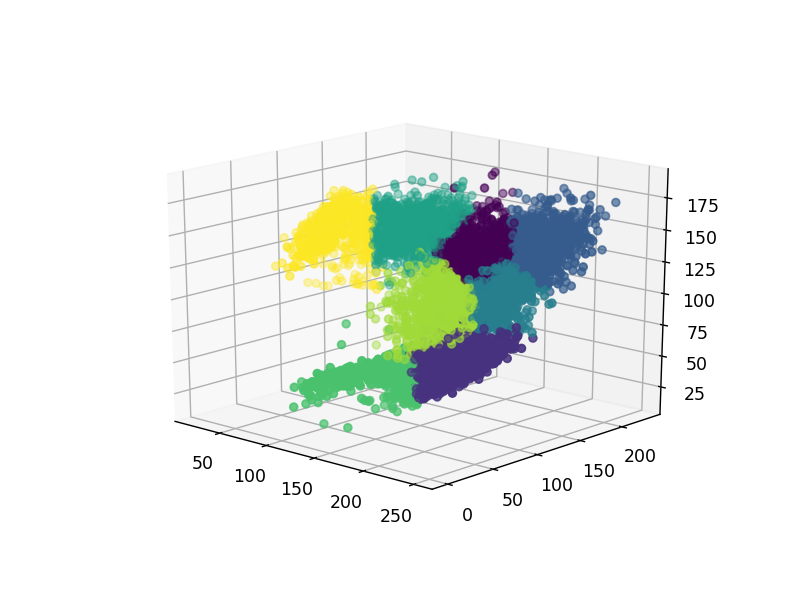

In [63]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s_im[0], s_im[1], s_im[2], c=k_means.labels_)

In [66]:
inertia_list = []
for i in range(1, 21):
    k_means = KMeans(n_clusters=i).fit(s_im.transpose())
    inertia_list.append(k_means.inertia_)
    
print(inertia_list)

[37406319.69199563, 23362447.236488238, 11417637.981231146, 8519133.41808217, 7144160.842685892, 5799763.243791571, 4944487.843222708, 4341439.530886551, 3969239.9182723905, 3631736.2716564536, 3327858.6787752584, 3054667.474489064, 2894226.1343632373, 2749540.464049508, 2602370.7290001675, 2473051.06296726, 2341588.152267559, 2249018.1856730594, 2164125.728970038, 2093526.7760068583]


<IPython.core.display.Javascript object>


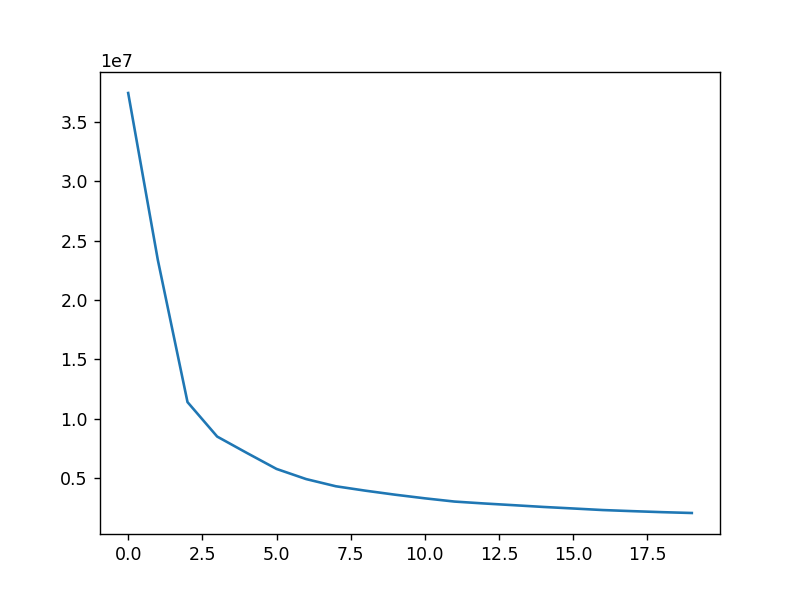

In [67]:
plt.plot(inertia_list)

In [80]:
s_im_hsl = np.array(rgb2hsl(*s_im))
s_im_hsl.shape

(3, 8383)

<IPython.core.display.Javascript object>


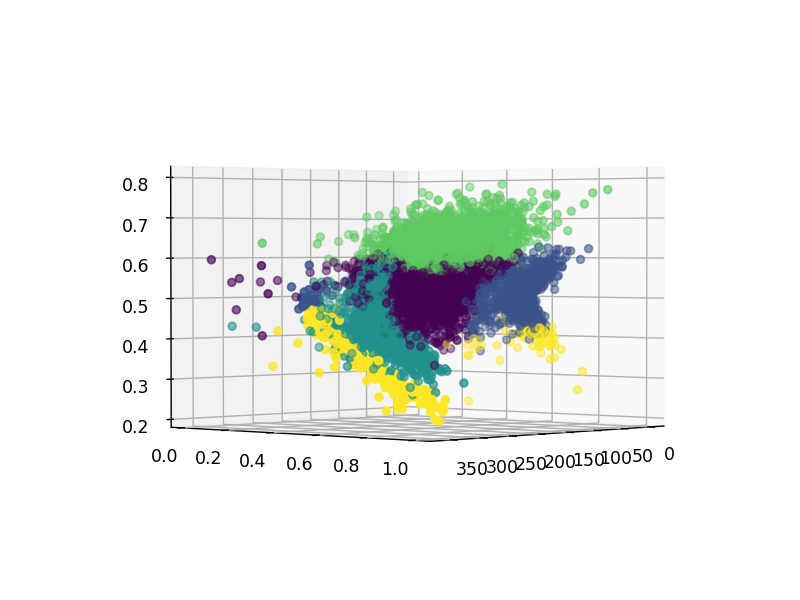

In [82]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s_im_hsl[0], s_im_hsl[1], s_im_hsl[2], c=k_means.labels_)

In [83]:
k_means = KMeans().fit(s_im_hsl.transpose())

<IPython.core.display.Javascript object>


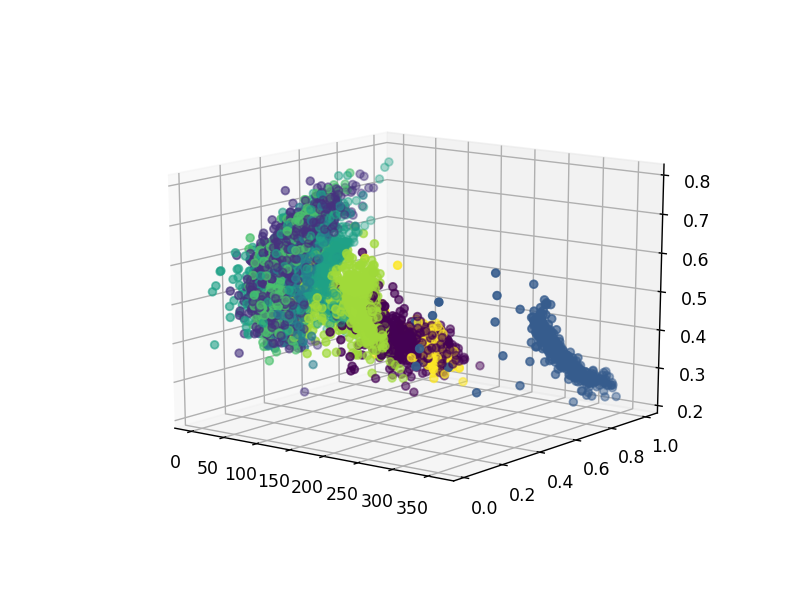

In [84]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(s_im_hsl[0], s_im_hsl[1], s_im_hsl[2], c=k_means.labels_)

In [86]:
inertia_list = []
for i in range(1, 21):
    k_means = KMeans(n_clusters=i).fit(s_im_hsl.transpose())
    inertia_list.append(k_means.inertia_)
    
print(inertia_list)

[55002674.39393792, 13207062.370204197, 4456539.196440735, 2458987.515423312, 1630724.8239858754, 955149.641430732, 703122.356355429, 550622.46286402, 433651.8154293837, 357271.6798463967, 296108.4941364844, 245056.75471825106, 216269.9523840705, 189150.31682357212, 167023.5862507669, 147358.60252851865, 135466.1595528059, 121229.73193199275, 108044.94928499777, 96958.26275395189]


<IPython.core.display.Javascript object>


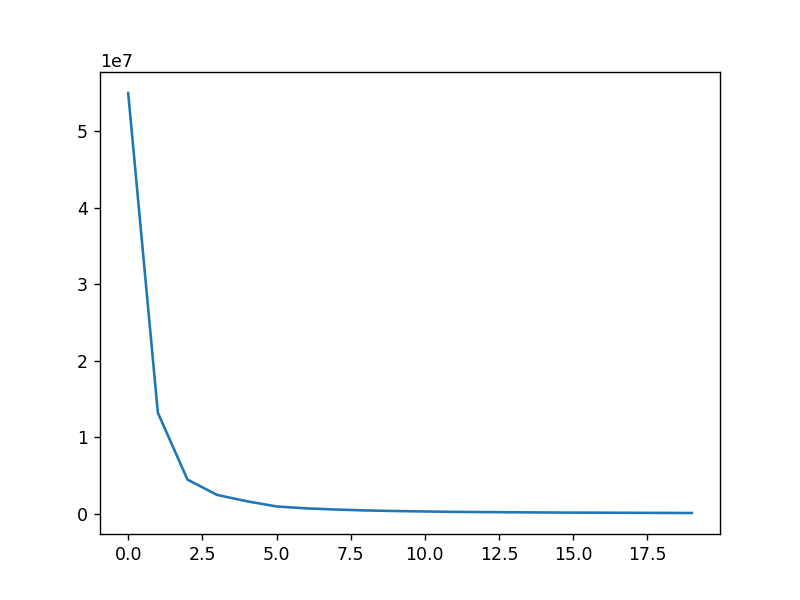

In [87]:
plt.plot(inertia_list)